In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:

print("Dataset shape (rows, cols):", df.shape)          # форма
print(df.info())                                        # типы данных
print(df.isnull().sum())                                # пропуски

Dataset shape (rows, cols): (100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               

In [4]:
# Сколько положительных/отрицательных случаев
# 0 = no diabetes, 1 = diabetes
counts = df['diabetes'].value_counts().sort_index()
ratios = (counts / len(df) * 100).round(2)

print("\nClass counts (0=no_diabetes, 1=diabetes):")
print(counts.to_string())

print("\nClass ratios (%):")
print(ratios.to_string())

# Разделение на признаки и цель
# На этом шаге просто делим; кодирование категориальных признаков будет позже
X = df.drop(columns='diabetes')   # признаки
y = df['diabetes']                # целевая переменная

# Деление на train/test с сохранением пропорций классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("\nSplit sizes:")
print("X_train:", X_train.shape, "| y_train:", y_train.shape)
print("X_test :", X_test.shape,  "| y_test :", y_test.shape)


Class counts (0=no_diabetes, 1=diabetes):
diabetes
0    91500
1     8500

Class ratios (%):
diabetes
0    91.5
1     8.5

Split sizes:
X_train: (80000, 8) | y_train: (80000,)
X_test : (20000, 8) | y_test : (20000,)


In [5]:
from sklearn.preprocessing import StandardScaler

# рус: 1) объявляем модель, но НЕ обучаем (обучение будет в Exercise 3)
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
print("Chosen model: Logistic Regression (good baseline for binary target, probabilistic and interpretable).")

# рус: 2) какие признаки считаем числовыми/категориальными/бинарными
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']   # рус: их стандартизируем
cat_cols = ['gender', 'smoking_history']                           # рус: one-hot
bin_cols = ['hypertension', 'heart_disease']                        # рус: оставляем как есть

# рус: 3) one-hot кодирование категориальных столбцов (drop_first=True, чтобы избежать лишней коллинеарности)
X_train_enc = pd.get_dummies(X_train.copy(), columns=cat_cols, drop_first=True)
X_test_enc  = pd.get_dummies(X_test.copy(),  columns=cat_cols, drop_first=True)

# рус: 4) выравниваем столбцы train/test после get_dummies (на тесте могут отсутствовать какие-то категории)
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

# рус: 5) стандартизируем ТОЛЬКО числовые колонки
scaler = StandardScaler()
X_train_enc[num_cols] = scaler.fit_transform(X_train_enc[num_cols])   # рус: fit на train, transform на train
X_test_enc[num_cols]  = scaler.transform(X_test_enc[num_cols])        # рус: transform на test тем же scaler

print("Need to standardize: Yes (for Logistic Regression).")
print("Scaled numeric columns:", num_cols)
print("Train shape:", X_train_enc.shape, "| Test shape:", X_test_enc.shape)

# рус: 6) маленькая проверка: средние ≈ 0, ст. откл. ≈ 1 для train-после-скейлинга
print("Means after scaling (train):", np.round(X_train_enc[num_cols].mean(), 3).to_dict())
print("Stds after scaling (train):",  np.round(X_train_enc[num_cols].std(),  3).to_dict())

# рус: 7) Эти матрицы используем в следующем задании для обучения:
X_train_ready = X_train_enc
X_test_ready  = X_test_enc

Chosen model: Logistic Regression (good baseline for binary target, probabilistic and interpretable).
Need to standardize: Yes (for Logistic Regression).
Scaled numeric columns: ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
Train shape: (80000, 13) | Test shape: (20000, 13)
Means after scaling (train): {'age': -0.0, 'bmi': 0.0, 'HbA1c_level': 0.0, 'blood_glucose_level': -0.0}
Stds after scaling (train): {'age': 1.0, 'bmi': 1.0, 'HbA1c_level': 1.0, 'blood_glucose_level': 1.0}


In [6]:
# 🌟 Exercise 3: Training, Evaluating, and Optimizing the Model

# рус: импорт модели
from sklearn.linear_model import LogisticRegression

# рус: создаём ЛОГИСТИЧЕСКУЮ РЕГРЕССИЮ
# rus: class_weight='balanced' помогает при дисбалансе классов; max_iter увеличиваем, чтобы гарантированно сошлось
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# rus: обучаем модель на подготовленных данных (из задания 2: X_train_ready, y_train)
log_reg.fit(X_train_ready, y_train.values.ravel())

print("Model trained: Logistic Regression.")

# rus: делаем предсказания для теста (понадобятся в упражнении 4)
y_pred = log_reg.predict(X_test_ready)                 # рус: метки 0/1
y_proba = log_reg.predict_proba(X_test_ready)[:, 1]    # рус: вероятность класса 1 (диабет)

print("Predictions ready: labels and probabilities saved as 'y_pred' and 'y_proba'.")
print("Examples of probabilities:", y_proba[:5])


Model trained: Logistic Regression.
Predictions ready: labels and probabilities saved as 'y_pred' and 'y_proba'.
Examples of probabilities: [0.13995932 0.0392365  0.00097478 0.02576745 0.06864202]


Accuracy: 0.889


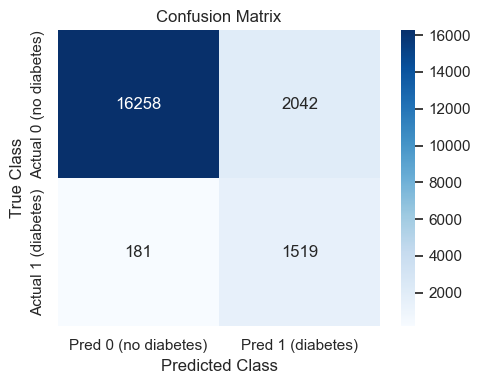

Precision: 0.427
Recall: 0.894
F1-score: 0.577


In [7]:
# --- Exercise 4: Evaluation Metrics ---

# рус: импорт метрик и инструментов визуализации
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)

sns.set()

# ===== 1) Accuracy =====
# рус: считаем долю правильных предсказаний (может быть обманчива при дисбалансе классов)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

# ===== 2) Confusion matrix (теплокарта) =====
# рус: строим матрицу ошибок для классов 0 (no diabetes) и 1 (diabetes)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
cm_df = pd.DataFrame(cm, index=['Actual 0 (no diabetes)','Actual 1 (diabetes)'],
                        columns=['Pred 0 (no diabetes)','Pred 1 (diabetes)'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.tight_layout()
plt.show()

# ===== 3) Precision, Recall, F1 =====
# рус: zero_division=0 — безопасно обработать редкие случаи, когда деление на ноль
prec  = precision_score(y_test, y_pred, zero_division=0)
rec   = recall_score(y_test, y_pred, zero_division=0)
f1    = f1_score(y_test, y_pred, zero_division=0)

print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")


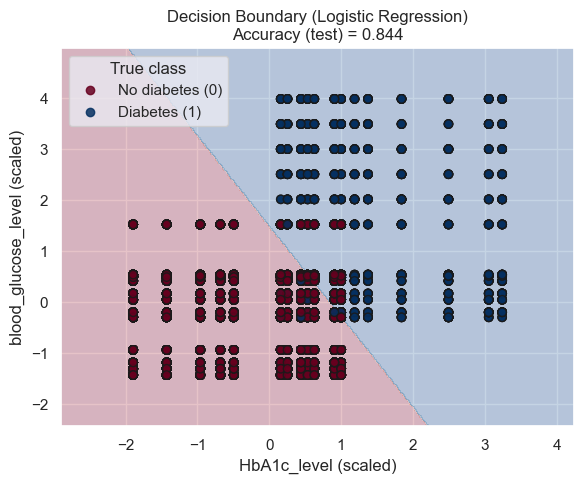

In [8]:
# === Exercise 5: Visualizing the performance (decision boundary) ===
# рус: для визуализации граничной линии возьмём только 2 числовых признака, чтобы можно было нарисовать 2D-карту.
# рус: используем HbA1c_level и blood_glucose_level — они логично связаны с диабетом.


sns.set()

# рус: если df ещё не в памяти — раскомментируй следующую строку
# df = pd.read_csv('diabetes_prediction_dataset.csv')

feat2 = ['HbA1c_level', 'blood_glucose_level']
X2 = df[feat2].copy()
y2 = df['diabetes'].copy()

# рус: train/test со стратификацией (сохраняем долю классов)
X2_tr, X2_te, y2_tr, y2_te = train_test_split(
    X2, y2, test_size=0.20, random_state=42, stratify=y2
)

# рус: стандартизация двух признаков (улучшает обучение логистической регрессии)
sc2 = StandardScaler()
X2_tr_sc = sc2.fit_transform(X2_tr)
X2_te_sc = sc2.transform(X2_te)

# рус: обучаем простую логистическую регрессию на этих 2 фичах
clf2 = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
clf2.fit(X2_tr_sc, y2_tr)

# рус: считаем accuracy на тесте — добавим её в заголовок
y2_pred = clf2.predict(X2_te_sc)
acc2 = accuracy_score(y2_te, y2_pred)

# рус: создаём сетку точек для отрисовки границы решений
x_min, x_max = X2_tr_sc[:, 0].min() - 1, X2_tr_sc[:, 0].max() + 1
y_min, y_max = X2_tr_sc[:, 1].min() - 1, X2_tr_sc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
zz = clf2.predict(grid).reshape(xx.shape)

# рус: рисуем decision boundary + точки теста
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, zz, alpha=0.25, cmap='RdBu')  # рус: область классов
scatter = plt.scatter(X2_te_sc[:, 0], X2_te_sc[:, 1],
                      c=y2_te, cmap='RdBu', edgecolor='k', alpha=0.85)
plt.xlabel('HbA1c_level (scaled)')
plt.ylabel('blood_glucose_level (scaled)')
plt.title(f'Decision Boundary (Logistic Regression)\nAccuracy (test) = {acc2:.3f}')
handles, _ = scatter.legend_elements()
plt.legend(handles, ['No diabetes (0)', 'Diabetes (1)'], title='True class', loc='best')
plt.tight_layout()
plt.show()


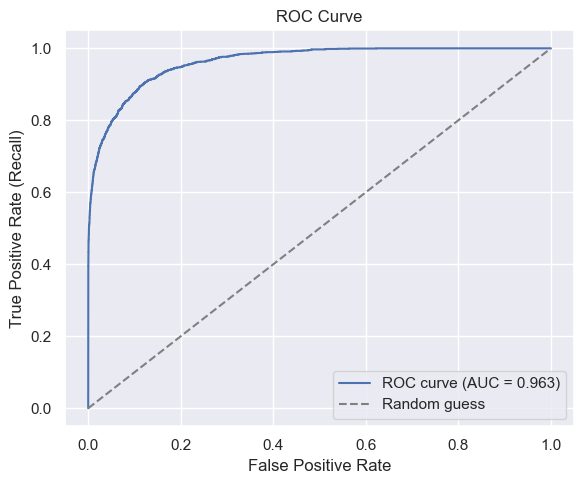

In [9]:
# === Exercise 6: ROC Curve ===
# рус: строим ROC-кривую и считаем AUC.
# рус: используем вероятности класса 1 (diabetes). Если y_proba ещё не посчитан — посчитаем через обученную модель.

from sklearn.metrics import roc_curve, auc

# рус: если у тебя уже есть обученная полная модель (на всех фичах) и матрицы X_test_ready/y_test,
# то можно получить вероятности так:
try:
    y_proba_full = log_reg.predict_proba(X_test_ready)[:, 1]
except NameError:
    # рус: если log_reg/X_test_ready не определены, fallback — используем упрощённую модель clf2 и её тестовые данные
    y_proba_full = clf2.predict_proba(X2_te_sc)[:, 1]
    y_test_full  = y2_te
else:
    y_test_full = y_test

# рус: вычисляем точки ROC и AUC
fpr, tpr, _ = roc_curve(y_test_full, y_proba_full)
roc_auc = auc(fpr, tpr)

# рус: рисуем ROC-кривую
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
